#K-means Algorithm

###The k-means clustering algorithm represents each cluster by its corresponding cluster centroid. The algorithm would partition the input data into k disjoint clusters by iteratively applying the following two steps:
1. Form k clusters by assigning each instance to its nearest centroid.
2. Recompute the centroid of each cluster.
In this section, we perform k-means clustering on a toy example of movie ratings dataset.
We first create the dataset as follows:

In [7]:
import pandas as pd

ratings = [['john',5,5,2,1],['mary',4,5,3,2],['bob',4,4,4,3],['lisa',2,2,4,5],['lee',1,2,3,4],['harry',2,1,5,5]]
titles = ['user','Jaws','Star Wars','Exorcist','Omen']
movies = pd.DataFrame(ratings,columns=titles)
movies

,user,Jaws,Star Wars,Exorcist,Omen
0,john,5,5,2,1
1,mary,4,5,3,2
2,bob,4,4,4,3
3,lisa,2,2,4,5
4,lee,1,2,3,4
5,harry,2,1,5,5


### In this example dataset, the first 3 users liked action movies (Jaws and Star Wars) while the last 3 users enjoyed horror movies (Exorcist and Omen). Our goal is to apply k-means clustering on the users to identify groups of users with similar movie preferences.

### The example below shows how to apply k-means clustering (with k=2) on the movie ratings data. We must remove the "user" column first before applying the clustering algorithm. The cluster assignment for each user is displayed as a dataframe object.

In [3]:
from sklearn import cluster

data = movies.drop('user',axis=1)
k_means = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1) # random_state: random initialization of centroids
k_means.fit(data)
labels = k_means.labels_
pd.DataFrame(labels, index=movies.user, columns=['Cluster ID'])



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Cluster ID
user,
john,1
mary,1
bob,1
lisa,0
lee,0
harry,0


### The k-means clustering algorithm assigns the first three users to one cluster and the last three users to the second cluster. The results are consistent with our expectation. We can also display the centroid for each of the two clusters.

In [8]:
centroids = k_means.cluster_centers_
pd.DataFrame(centroids,columns=data.columns)

,Jaws,Star Wars,Exorcist,Omen
0,2.0,1.0,5.0,5.0
1,4.0,5.0,3.0,2.0
2,1.0,2.0,3.0,4.0
3,4.0,4.0,4.0,3.0
4,5.0,5.0,2.0,1.0
5,2.0,2.0,4.0,5.0


### Observe that cluster 0 has higher ratings for the horror movies whereas cluster 1 has higher ratings for action movies. The cluster centroids can be applied to other users to determine their cluster assignments.

In [5]:
import numpy as np

testData = np.array([[4,5,1,2],[3,2,4,4],[2,3,4,1],[3,2,3,3],[5,4,1,4]])
labels = k_means.predict(testData)
labels = labels.reshape(-1,1)
usernames = np.array(['paul','kim','liz','tom','bill']).reshape(-1,1)
cols = movies.columns.tolist()
cols.append('Cluster ID')
newusers = pd.DataFrame(np.concatenate((usernames, testData, labels), axis=1),columns=cols)
newusers

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


,user,Jaws,Star Wars,Exorcist,Omen,Cluster ID
0,paul,4,5,1,2,1
1,kim,3,2,4,4,0
2,liz,2,3,4,1,1
3,tom,3,2,3,3,0
4,bill,5,4,1,4,1


### To determine the number of clusters in the data, we can apply k-means with varying number of clusters from 1 to 6 and compute their corresponding sum-of-squared errors (SSE) as shown in the example below. The "elbow" in the plot of SSE versus number of clusters can be used to estimate the number of clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'SSE')

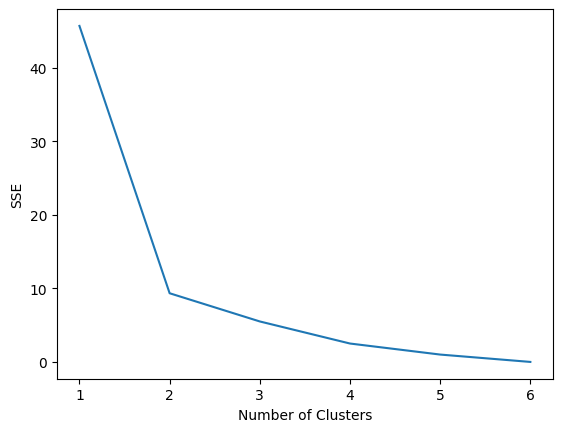

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

numClusters = [1,2,3,4,5,6]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(data)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')